<a href="https://colab.research.google.com/github/Aliyahk888/Social-Media-Interaction-based-Mental-Health-Analysis-/blob/main/MentalHealthCUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP PROJECT - MENTAL HEALTH CUI

Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from gensim.models import Word2Vec  
from sklearn.feature_extraction.text import TfidfVectorizer   

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, word_tokenize
# sklearn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
!pip install tweepy
!pip install --upgrade tweepy

     |████████████████████████████████| 77 kB 3.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Importing dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/NLP Project/Data/BehaviouralTweets.xlsx')
df.tail(5)

,Tweet,Behaviour
37985,Since I was 9 I felt depressed and almost took...,Suicidal
37986,I don't know why I'm reaching out now of all t...,Suicidal
37987,"I dont believe in an afterlife, but i stay up ...",Suicidal
37988,"I don't think I actually will kill myself, but...",Suicidal
37989,I wanna die so badly but everytime I hear abou...,Suicidal


Data Preprocessing

In [ ]:
#dropping null values
df.dropna(inplace = True)
df.shape

(37959, 2)

In [ ]:
#drop duplicate rows 
df=df.drop_duplicates(subset=['Tweet'], keep='last')

In [ ]:
df.shape
df.reset_index

<bound method DataFrame.reset_index of                                                    Tweet Behaviour
0               remember hillary email non secure server    Normal
1                                       cant avoid demon    Normal
2      por fin la pusieron en spotify losing way de f...    Normal
3                                                  kills    Normal
4      thank introduce important gunsense law make co...    Normal
...                                                  ...       ...
37985  Since I was 9 I felt depressed and almost took...  Suicidal
37986  I don't know why I'm reaching out now of all t...  Suicidal
37987  I dont believe in an afterlife, but i stay up ...  Suicidal
37988  I don't think I actually will kill myself, but...  Suicidal
37989  I wanna die so badly but everytime I hear abou...  Suicidal

[19341 rows x 2 columns]>

In [ ]:
df.shape

(19341, 2)

Assigning numeric values to target labels

In [ ]:
possible_labels = df.Behaviour.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Anxious': 3, 'Lonely': 2, 'Normal': 0, 'Stressed': 1, 'Suicidal': 4}

In [ ]:
df['Behaviour'] = df.Behaviour.replace(label_dict)

In [ ]:
df

,Tweet,Behaviour
0,remember hillary email non secure server,0
1,cant avoid demon,0
2,por fin la pusieron en spotify losing way de f...,0
3,kills,0
4,thank introduce important gunsense law make co...,0
...,...,...
37985,Since I was 9 I felt depressed and almost took...,4
37986,I don't know why I'm reaching out now of all t...,4
37987,"I dont believe in an afterlife, but i stay up ...",4
37988,"I don't think I actually will kill myself, but...",4


In [ ]:
#shuffle dataset
df = df.sample(frac = 1).reset_index(drop=True)
df

,Tweet,Behaviour
0,know shell tire soon,1
1,mmmm need toe suck fuck,3
2,oh excuse im originally melbourne party id lik...,3
3,im excite valentines day im die alone,3
4,hope u guy know u ever need talk someone regar...,2
...,...,...
19336,Why is trying to kill yourself so hard and sca...,4
19337,suppose sleep maybe bad idea maybe best idea c...,1
19338,sad thank effort generosity appreciate hop you...,1
19339,depend teach people need know deal know fail a...,3


In [ ]:
df['Behaviour'].value_counts()

0    9029
3    5734
1    4052
4     465
2      61
Name: Behaviour, dtype: int64

Tokenization

In [ ]:
tweet_tokenizer = TweetTokenizer()
tweet_tokens = []
for index, row in df.iterrows():
    tweet_tokens.append(word_tokenize(str(row['Tweet'])))
df['text_clean'] = tweet_tokens
print('Tokenization complete.')
df

Tokenization complete.


,Tweet,Behaviour,text_clean
0,know shell tire soon,1,"[know, shell, tire, soon]"
1,mmmm need toe suck fuck,3,"[mmmm, need, toe, suck, fuck]"
2,oh excuse im originally melbourne party id lik...,3,"[oh, excuse, im, originally, melbourne, party,..."
3,im excite valentines day im die alone,3,"[im, excite, valentines, day, im, die, alone]"
4,hope u guy know u ever need talk someone regar...,2,"[hope, u, guy, know, u, ever, need, talk, some..."
...,...,...,...
19336,Why is trying to kill yourself so hard and sca...,4,"[Why, is, trying, to, kill, yourself, so, hard..."
19337,suppose sleep maybe bad idea maybe best idea c...,1,"[suppose, sleep, maybe, bad, idea, maybe, best..."
19338,sad thank effort generosity appreciate hop you...,1,"[sad, thank, effort, generosity, appreciate, h..."
19339,depend teach people need know deal know fail a...,3,"[depend, teach, people, need, know, deal, know..."


Cleaning the Data

In [ ]:
# Remove stop words
stop_words=set(nltk.corpus.stopwords.words("english"))
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
print('Stop words removed.')


# Remove numbers, punctuation and special characters (only keep words)
regex = '[a-z]+'
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if re.match(regex, item)])
print('Numbers, punctuation and special characters removed.')


# Lemmatization 
lem = nltk.stem.wordnet.WordNetLemmatizer()
df['text_clean'] = df['text_clean'].apply(lambda x: [lem.lemmatize(item, pos='v') for item in x])
print('Lemmatization complete.\nData cleaning complete.\n')

Stop words removed.
Numbers, punctuation and special characters removed.
Lemmatization complete.
Data cleaning complete.



In [ ]:
df

,Tweet,Behaviour,text_clean
0,know shell tire soon,1,"[know, shell, tire, soon]"
1,mmmm need toe suck fuck,3,"[mmmm, need, toe, suck, fuck]"
2,oh excuse im originally melbourne party id lik...,3,"[oh, excuse, im, originally, melbourne, party,..."
3,im excite valentines day im die alone,3,"[im, excite, valentines, day, im, die, alone]"
4,hope u guy know u ever need talk someone regar...,2,"[hope, u, guy, know, u, ever, need, talk, some..."
...,...,...,...
19336,Why is trying to kill yourself so hard and sca...,4,"[try, kill, hard, scary, try, kill, many, time..."
19337,suppose sleep maybe bad idea maybe best idea c...,1,"[suppose, sleep, maybe, bad, idea, maybe, best..."
19338,sad thank effort generosity appreciate hop you...,1,"[sad, thank, effort, generosity, appreciate, h..."
19339,depend teach people need know deal know fail a...,3,"[depend, teach, people, need, know, deal, know..."


In [ ]:
#converting cleaned text into string
df['liststring'] = [' '.join(map(str, l)) for l in df['text_clean']]
df=df.rename(columns={'text_clean':'text'})
df

,Tweet,Behaviour,text,liststring
0,know shell tire soon,1,"[know, shell, tire, soon]",know shell tire soon
1,mmmm need toe suck fuck,3,"[mmmm, need, toe, suck, fuck]",mmmm need toe suck fuck
2,oh excuse im originally melbourne party id lik...,3,"[oh, excuse, im, originally, melbourne, party,...",oh excuse im originally melbourne party id lik...
3,im excite valentines day im die alone,3,"[im, excite, valentines, day, im, die, alone]",im excite valentines day im die alone
4,hope u guy know u ever need talk someone regar...,2,"[hope, u, guy, know, u, ever, need, talk, some...",hope u guy know u ever need talk someone regar...
...,...,...,...,...
19336,Why is trying to kill yourself so hard and sca...,4,"[try, kill, hard, scary, try, kill, many, time...",try kill hard scary try kill many time lose co...
19337,suppose sleep maybe bad idea maybe best idea c...,1,"[suppose, sleep, maybe, bad, idea, maybe, best...",suppose sleep maybe bad idea maybe best idea c...
19338,sad thank effort generosity appreciate hop you...,1,"[sad, thank, effort, generosity, appreciate, h...",sad thank effort generosity appreciate hop you...
19339,depend teach people need know deal know fail a...,3,"[depend, teach, people, need, know, deal, know...",depend teach people need know deal know fail a...


##Long Short Term Memory (LSTM) for Text Classification

In [ ]:
X=df.text
y=df.Behaviour

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.2, random_state=2)

In [ ]:
def tensorflow_based_model(): 
    inputs = Input(name='inputs',shape=[max_len])

    layer = Embedding(2000,50,input_length=max_len)(inputs) 

    layer = LSTM(64)(layer) 

    layer = Dense(256,name='FC1')(layer) 

    layer = Activation('relu')(layer) 

    layer = Dropout(0.5)(layer) 

    layer = Dense(5,name='out_layer')(layer) 
  
    layer = Activation('softmax')(layer)
    
    model = Model(inputs=inputs,outputs=layer)
    
    return model 

In [ ]:
#compiling the model
model = tensorflow_based_model() 
model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
175/175 [==============================] - 82s 453ms/step - loss: 0.8751 - accuracy: 0.6340 - val_loss: 1.6128 - val_accuracy: 0.4496
Epoch 2/6
175/175 [==============================] - 76s 434ms/step - loss: 0.4126 - accuracy: 0.8767 - val_loss: 0.3525 - val_accuracy: 0.8966
Epoch 3/6
175/175 [==============================] - 76s 436ms/step - loss: 0.3201 - accuracy: 0.9023 - val_loss: 0.3882 - val_accuracy: 0.8798
Epoch 4/6
175/175 [==============================] - 76s 436ms/step - loss: 0.2904 - accuracy: 0.9105 - val_loss: 0.3634 - val_accuracy: 0.8902
Epoch 5/6
175/175 [==============================] - 77s 439ms/step - loss: 0.2754 - accuracy: 0.9137 - val_loss: 0.4004 - val_accuracy: 0.8798
Epoch 6/6
175/175 [==============================] - 76s 434ms/step - loss: 0.2595 - accuracy: 0.9188 - val_loss: 0.3581 - val_accuracy: 0.8902
Training finished !!


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/NLP Project/Data/ClassifyTweets.h5')

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 50)           100000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 5)                 1285  

In [ ]:
accr1 = model.evaluate(X_test,Y_test)

121/121 [==============================] - 8s 64ms/step - loss: 0.3764 - accuracy: 0.8876


In [ ]:
print('Test set\n Accuracy: {:0.2f}'.format(accr1[1]))

Test set
 Accuracy: 0.89


In [ ]:
model=load_model('/content/drive/MyDrive/NLP Project/Data/ClassifyTweets.h5')
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[[9.8393548e-01 7.6770578e-03 7.0287172e-07 7.6583382e-03 7.2833931e-04]
 [4.5835283e-03 9.9285841e-01 2.5866461e-07 2.5522041e-03 5.6698204e-06]
 [9.8010373e-01 5.6597469e-03 3.8679224e-07 1.4136305e-02 9.9868652e-05]
 ...
 [9.8786420e-01 8.5750874e-03 1.3972289e-07 2.6635411e-03 8.9699303e-04]
 [9.3318260e-01 4.9538884e-02 1.9092902e-06 1.6960047e-02 3.1664196e-04]
 [9.4135463e-01 9.0568867e-03 3.7557722e-05 4.0058881e-02 9.4919968e-03]]


In [ ]:
preds_classes = np.argmax(y_pred, axis=-1)

##SVM for Text Classification

In [ ]:
df['Tweet'] = df['Tweet'].astype(str)

In [ ]:
X=df["liststring"]
y=df["Behaviour"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)


TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
print("Accuracy: ")
print(accuracy_score(y_test, y_pred2))

#obtained an accuracy of 80% including depression data, and an accuracy of 88% without including it

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1765
           1       0.94      0.89      0.91       830
           2       1.00      0.31      0.47        13
           3       0.84      0.88      0.86      1161
           4       0.89      0.76      0.82       100

    accuracy                           0.88      3869
   macro avg       0.91      0.75      0.79      3869
weighted avg       0.88      0.88      0.88      3869

Accuracy: 
0.8821400878780047


* By comparing the performance of the LSTM and SVM models on real life tweets, it is observed that theoretically LSTM has a slightly better accuracy than SVM, but SVM performs better on realtime Twitter data.

## Scraping Tweets

Import required libraries

In [ ]:
import tweepy
from tweepy import OAuthHandler
import csv

Predicting mental health state from the user's twitter activity

In [ ]:
access_token= '927758488448540672-V9f1iZ8Xl5u8PRdYuhYzaK3wGpEVd7W'
access_token_secret='4QjnM7j7He7Vrca2mSIwWVrMzqZRwbPWyJLHriXhg7jvl'
consumer_key='7t3EfDbNx1cdj5KBA6BO38nRp'
consumer_secret = 'SKSf1vh0LMqtWAmSpcHlqk2loT2uT5x31zbXUGEKeddELKu7Gj'
bearer_token='AAAAAAAAAAAAAAAAAAAAABirbAEAAAAAsbhVcDoV2qJpmsXuQDktPTcRReY%3D4XXHv6gzSj6FmdTGDFwQINEwvcrJVpRpVCiZaQ2kW0XsBwXgEh'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
print("Authenticated")


Authenticated


In [ ]:
Client=tweepy.Client(bearer_token=bearer_token, consumer_key=consumer_key, consumer_secret=consumer_secret, access_token=access_token, access_token_secret=access_token_secret, wait_on_rate_limit=False)

In [ ]:
try:
  temp = Client.get_users_tweets(id='1225603175748685824', start_time='2022-03-01T00:00:00Z', end_time='2022-03-14T00:00:00Z', max_results=100)
  length=len(temp[0])
  print(len(temp[0]))
except:
  print("Insufficient data to generate report!")


100


In [ ]:
if(length < 40):
  temp2 = Client.get_users_tweets(id='1225603175748685824', start_time='2022-03-01T00:00:00Z', end_time='2022-03-28T00:00:00Z', max_results=100)
  length=len(temp2[0])
  print(len(temp2[0]))

In [ ]:
csvFile = open('/content/drive/MyDrive/NLP Project/Data/result.csv', 'w', encoding='utf-8')
orig_file=csvFile
#Use csv writer
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['Text'])

6

In [ ]:
for i in range(length):
    csvWriter.writerow([str(temp[0][i])])
csvFile.close()

In [ ]:
test_data=pd.read_csv('/content/drive/MyDrive/NLP Project/Data/result.csv', encoding='utf-8')
print(test_data)
test_data.head()
test_data.dropna(inplace = True)
test_data.shape

tweet_tokenizer = TweetTokenizer()
tweet_tokens = []
for index, row in test_data.iterrows():
    tweet_tokens.append(word_tokenize(str(row['Text'])))
test_data['text_clean'] = tweet_tokens
print('Tokenization complete.')
test_data


stop_words=set(nltk.corpus.stopwords.words("english"))
test_data['text_clean'] = test_data['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
print('Stop words removed.')



test_data['text_clean'] = test_data['text_clean'].apply(lambda x: [item for item in x if re.match(regex, item)])
print('Numbers, punctuation and special characters removed.')


lem = nltk.stem.wordnet.WordNetLemmatizer()
test_data['text_clean'] = test_data['text_clean'].apply(lambda x: [lem.lemmatize(item, pos='v') for item in x])
print('Lemmatization complete.\nData cleaning complete.\n')


test_data['liststring'] = [' '.join(map(str, l)) for l in test_data['text_clean']]
test_data['Text'] = test_data['Text'].astype(str)
test_data_transform = vectoriser.transform(test_data["liststring"])
test_data_transform

#make prediction

test_pred = SVCmodel.predict(test_data_transform)
print(test_data)

                                                 Text
0                      @CLASHBooks @Eve6 um OF COURSE
1   me, after 1 hour of socializing with friends: ...
2       rendezvous then I’m through with you, amirite
3   being a 90’s teen wasn’t always easy, but noth...
4   a jogger, being chased: *ecstatically* i’ve be...
..                                                ...
95  i will spend all day answering one email then ...
96  hear me out: a writer’s retreat for parents wh...
97                       @evelyngfrick neighbors!!!!!
98  RT @sherrysworld: my friends when i can’t do b...
99  @sherrysworld @Jest_Iris @ElaniKitten @showmet...

[100 rows x 1 columns]
Tokenization complete.
Stop words removed.
Numbers, punctuation and special characters removed.
Lemmatization complete.
Data cleaning complete.

                                                 Text  \
0                      @CLASHBooks @Eve6 um OF COURSE   
1   me, after 1 hour of socializing with friends: ...   
2       rend

In [ ]:
# X=test_data['text_clean']

# max_len = 500
# tok = Tokenizer(num_words=2000)
# tok.fit_on_texts(X)
# sequences = tok.texts_to_sequences(X)
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
#pred = model.predict(sequences_matrix)

In [ ]:
#test_pred = np.argmax(pred, axis=-1)

In [ ]:
total= len(test_pred)
print(total)
unique, counts = np.unique(test_pred, return_counts=True)
print(unique, counts)
print(np.asarray((unique, counts)).T)

100
[0 1 3 4] [84  5  7  4]
[[ 0 84]
 [ 1  5]
 [ 3  7]
 [ 4  4]]


In [ ]:
final_result= pd.read_csv('/content/drive/MyDrive/NLP Project/Data/result.csv')
final_result["labels"]=test_pred
final_result.rename(columns = {'b\'Text\'':'tweet'}, inplace = True)

In [ ]:
final_result

,Text,labels
0,@CLASHBooks @Eve6 um OF COURSE,0
1,"me, after 1 hour of socializing with friends: ...",0
2,"rendezvous then I’m through with you, amirite",0
3,"being a 90’s teen wasn’t always easy, but noth...",1
4,"a jogger, being chased: *ecstatically* i’ve be...",0
...,...,...
95,i will spend all day answering one email then ...,0
96,hear me out: a writer’s retreat for parents wh...,0
97,@evelyngfrick neighbors!!!!!,0
98,RT @sherrysworld: my friends when i can’t do b...,4


In [ ]:
final_result.to_csv('/content/drive/MyDrive/NLP Project/Data/result.csv')

#CONVERSATIONAL UI

In [ ]:
!pip install chatterbot
!pip install chatterbot-corpus

     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 1.3 MB 10.8 MB/s 
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.35
    Uninstalling SQLAlchemy-1.4.35:
      Successfully uninstalled SQLAlchemy-1.4.35
     |████████████████████████████████| 117 kB 5.1 MB/s 


In [ ]:
import nltk
import re

import pickle
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np 
import pandas as pd

from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer
from sklearn.metrics.pairwise import cosine_similarity

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Function to summarize answers

In [ ]:
def summary(text):
  stop_words = set(stopwords.words("english"))

  words = word_tokenize(text)
  freqTable = dict()
  for word in words:
    word = word.lower()
    if word in stop_words:
      continue
    if word in freqTable:
      freqTable[word] += 1
    else:
      freqTable[word] = 1

  sentences = sent_tokenize(text)
  sentenceValue = dict()
  for sentence in sentences:
    for word, freq in freqTable.items():
      if word in sentence.lower():
        if sentence in sentenceValue:
          sentenceValue[sentence] += freq
        else:
          sentenceValue[sentence] = freq

  temp={k: v for k, v in sorted(sentenceValue.items(), key=lambda item: item[1])}
  keys=list(temp)
  summary= str(keys[-1])+str(keys[-2])+str(keys[-3])

  return summary

##Dialogue Manager

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP Project/Data/Mental_Health_FAQ.csv')
df_report = pd.read_csv('/content/drive/MyDrive/NLP Project/Data/Report_corpus.csv')

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
def embed(input):
  return np.array(model([input]))
df['Question_Vector'] = df.Questions.map(embed)
df_report['Question_Vector'] = df_report.Questions.map(embed)
pickle.dump(df, open('dataset.pkl', 'wb'))
pickle.dump(df_report, open('dataset_report.pkl', 'wb'))


tp_df = pd.read_csv('/content/drive/MyDrive/NLP Project/Data/result.csv')
  
        
class DialogueManager(object):
    def __init__(self):
 
        
        self.model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
        self.dataset = pickle.load(open('dataset.pkl', mode='rb'))
        self.dataset_report = pickle.load(open('dataset_report.pkl', mode='rb'))
         
        self.QUESTION_VECTORS =  self.dataset.Question_Vector 
        self.REPORT_QUESTION_VECTORS =  self.dataset_report.Question_Vector 
        self.COSINE_THRESHOLD = 0.6
        
        self.chitchat_bot = ChatBot("Chatterbot")       
        trainer = ChatterBotCorpusTrainer(self.chitchat_bot)
        trainer.train("chatterbot.corpus.english")
 
         
    def embed(self,input):
        return np.array(self.model([input]))         
    
        
    def semantic_search(self, query):
        query_vec = self.embed(query)
        sims = dict()
        index=0
        for que_vec  in self.QUESTION_VECTORS:            
            sim =  cosine_similarity(que_vec, query_vec)
            sims[index]=sim[0][0]
            index=index+1

        temp = {k: v for k, v in sorted(sims.items(), key=lambda item: item[1])}
        key=list(temp)
        val=temp.values()
        val=list(val)
        keylist=[key[-1], key[-2], key[-3]]
        val_list=[val[-1],val[-2],val[-3]]
        return keylist, val_list

    def report_semantic_search(self, query):
        query_vec = self.embed(query)
        sims = []
        for que_vec  in self.REPORT_QUESTION_VECTORS:            
            sim =  cosine_similarity(que_vec, query_vec)
            sims.append(sim)
        max_ind = sims.index(max(sims))
        return max_ind,sims[max_ind][0][0] 

    def generate_answer(self, question):
        
        ind, most_relevant_sim_score = self.semantic_search(question)
        report_ind, report_most_relevant_sim_score = self.report_semantic_search(question)
         
        if report_most_relevant_sim_score >= self.COSINE_THRESHOLD:
            answer=self.dataset_report.Answers[report_ind] 
  

            if " normal" in question.lower() or " yellow" in question.lower():
              for i, row in tp_df.iterrows():
                if row['labels'] == 0:
                  answer += "\n"+row['Text'] + "\n\n"
            elif " stressed" in question.lower() or " blue" in question.lower():
              for i, row in tp_df.iterrows():
                if row['labels'] == 1:
                  answer+="\n"+row['Text'] + "\n\n"
            elif " lonely" in question.lower() or " gray" in question.lower():
              for i, row in tp_df.iterrows():
                if row['labels'] == 2:
                  answer+="\n"+row['Text'] + "\n\n"
            elif " anxious" in question.lower() or " green" in question.lower():
              for i, row in tp_df.iterrows():
                if row['labels'] == 3:
                  answer+="\n"+row['Text'] + "\n\n"           
            elif "suicidal" in question.lower() or " red" in question.lower():
              for i, row in tp_df.iterrows():
                if row['labels'] == 4:
                  answer+="\n"+row['Text'] + "\n\n"
            #elif "depressed" in question.lower():
              #for i, row in tp_df.iterrows():
                #if row['labels'] == 5:
                  #answer+=row['Text'] + "\n\n"
        elif sum(most_relevant_sim_score)/len(most_relevant_sim_score) >= self.COSINE_THRESHOLD: 
            answer = str(self.dataset.Answers[ind[0]]) + str(self.dataset.Answers[ind[1]]) + str(self.dataset.Answers[ind[2]])
            answer = summary(answer)
 

        else:
            answer = self.chitchat_bot.get_response(question)
        return answer

In [ ]:
dialogue_manager = DialogueManager()

Training ai.yml: [####################] 100%
Training botprofile.yml: [####################] 100%
Training computers.yml: [####################] 100%
Training conversations.yml: [####################] 100%
Training emotion.yml: [####################] 100%
Training food.yml: [####################] 100%
Training gossip.yml: [####################] 100%
Training greetings.yml: [####################] 100%
Training health.yml: [####################] 100%
Training history.yml: [####################] 100%
Training humor.yml: [####################] 100%
Training literature.yml: [####################] 100%
Training money.yml: [####################] 100%
Training movies.yml: [####################] 100%
Training politics.yml: [####################] 100%
Training psychology.yml: [####################] 100%
Training science.yml: [####################] 100%
Training sports.yml: [####################] 100%
Training trivia.yml: [####################] 100%


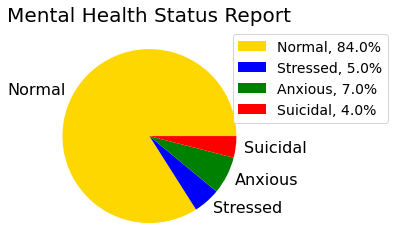

Hi
How are you doing?


Why does the report say I'm anxious?
The following posts that you liked indicated that you might have been anxious:
*FORMERLY. although I can see how formally could work too lol


RT @Dobrenkz: feeling more helpless by the day w everything in ukraine...realizing that helping in some small way is better than doing noth…


“this too shall pass” ok but could it pass a little more quickly


i need to admit something im ashamed of. first thing I’m doing when my kids get vaccinated is KARAOKE. unfollow if u must


Disney: we support gays but not as much as we love money :) hope that’s clear :)


today i learned I can get my kid to do ANYTHING she doesn’t wanna do if I make it a race. brushing her teeth? a race. putting on jammies? a race. putting away my laundry while I lay on the bed like a queen pointing at appropriate drawers? A MOTHER FUCKING RACE


in these challenging times, it’s important to remember that although we’re divided by class, race, and political/ide

In [ ]:
#test_pred=tp_df['labels']
#total= len(test_pred)
#print(total)
#unique, counts = np.unique(test_pred, return_counts=True)
report = dict()
for i in range(len(unique)):
  percentage = round((counts[i]/total)*100,2)

  for key, val in label_dict.items():
    if val==unique[i]:
      report[key]= str(percentage)


import matplotlib.pyplot as plt

y=np.array(list(report.values())).astype(float)
mylabels = report.keys()

labels = [f'{l}, {s:0.1f}%' for l, s in zip(mylabels, y)]
 


colours = {'Normal': 'gold',
           'Anxious': 'green',
           'Lonely': 'darkgray',
           'Stressed': 'blue',
           'Suicidal': 'red'}

plt.figure(figsize=(4,4))
plt.pie(y,
          labels=mylabels, textprops={"fontsize":16},
          colors=[colours[key] for key in mylabels])
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels, fontsize=14)
plt.title('Mental Health Status Report', fontsize=20)
plt.show() 

#userText=""
while(True):
  userText=input()
  if(userText=="bye!"):
    break
  response=str(dialogue_manager.generate_answer(userText))
  print(response)
  print("\n")
